In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

In [5]:
I = np.eye(3)
x = np.reshape(np.arange(9), (3, 3))
y = np.array([1, 2, 3])



In [6]:
portfolio = np.array([[4, 3],[2.5,3],[8,1.1]])
portfolioBetter = np.array([[4,2.5,8],[3,5,1.1]])
x=portfolioBetter[0]
y = portfolioBetter[1]

print(x@y)

33.3


In [7]:
test = np.ones((4,4))
print(test * 2)
test[0] = test[0] * 2
test[0:, 0] = 3

print(test)

[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
[[3. 2. 2. 2.]
 [3. 1. 1. 1.]
 [3. 1. 1. 1.]
 [3. 1. 1. 1.]]


In [8]:
x1 = np.reshape(np.arange(6), (3, 2))
x2 = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
x3 = np.array([[2, 5, 2], [1, 2, 1]])
x4 = np.ones((2, 3))

y1 = np.array([1, 2, 3])
y2 = np.array([0.5, 0.5])

print(np.dot(x1, x4))



[[1. 1. 1.]
 [5. 5. 5.]
 [9. 9. 9.]]


In [9]:
#my work (helper function)

def productionMatrix(year, production, productionDiscount, npvRate):
    prodMatrix =  np.array([
        ((1-productionDiscount)**(year - 1))*(production) * 1/((1 + npvRate) ** (year-1))

        for year in np.arange(1, year + 1)
    ])
    return prodMatrix

print(np.size((productionMatrix(20,5,0.2,0.05))))


20


In [10]:
#my work

years = 20

rateA = 0.2
productionA = 5

productionB = 2
rateB = 0.1

discount = 0.05


print(np.sum(productionMatrix(years, productionA, rateA, discount)) + np.sum(productionMatrix(years, productionB, rateB, discount)))

34.2672564874775


In [11]:
# website work

# Depreciation of production rates
gamma_A = 0.80
gamma_B = 0.90

# Interest rate discounting
r = 0.05
discount = np.array([(1 / (1+r))**t for t in range(20)])

# Let's first create arrays that have the production of each oilfield
oil_A = 5 * np.array([gamma_A**t for t in range(20)])
oil_B = 2 * np.array([gamma_B**t for t in range(20)])
oilfields = np.array([oil_A, oil_B])

# Use matrix multiplication to get discounted sum of oilfield values and then sum
# the two values
Vs = oilfields @ discount

print(f"The npv of oilfields is {Vs.sum()}")

The npv of oilfields is 34.2672564874775


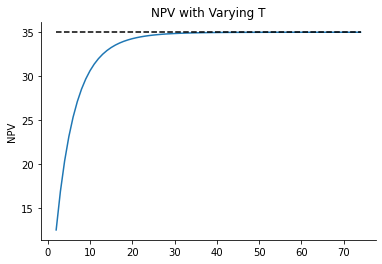

In [12]:
#website infinite horizon work 
# Depreciation of production rates
gamma_A = 0.80
gamma_B = 0.90

# Interest rate discounting
r = 0.05


def infhor_NPV_oilfield(starting_output, gamma, r):
    beta = gamma / (1 + r)
    return starting_output / (1 - beta)


def compute_NPV_oilfield(starting_output, gamma, r, T):
    outputs = starting_output * np.array([gamma**t for t in range(T)])
    discount = np.array([(1 / (1+r))**t for t in range(T)])

    npv = np.dot(outputs, discount)

    return npv

Ts = np.arange(2, 75)

NPVs_A = np.array([compute_NPV_oilfield(5, gamma_A, r, t) for t in Ts])
NPVs_B = np.array([compute_NPV_oilfield(2, gamma_B, r, t) for t in Ts])

NPVs_T = NPVs_A + NPVs_B
NPV_oo = infhor_NPV_oilfield(5, gamma_A, r) + infhor_NPV_oilfield(2, gamma_B, r)

fig, ax = plt.subplots()

ax.set_title("NPV with Varying T")
ax.set_ylabel("NPV")

ax.plot(Ts, NPVs_A + NPVs_B)
ax.hlines(NPV_oo, Ts[0], Ts[-1], color="k", linestyle="--")  # Plot infinite horizon value

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [13]:
#more website work

p_A = 1.0
p_B = 1.0
G = np.array([p_A, p_B])

r = 0.05
beta = 1 / (1 + r)

gamma_A = 0.80
gamma_B = 0.90
A = np.array([[gamma_A, 0], [0, gamma_B]])

x_0 = np.array([5, 2])

# Compute with matrix formula
NPV_mf = G @ np.linalg.inv(np.eye(2) - beta*A) @ x_0
#see website/personal notes for what this actually means
#can skip annoying for loops



In [14]:
#personal work

alpha = 0.05
phi = 0.10
T = 10

initialEmployment = np.array([900_000, 100_000])



matrixA = np.array([[1-alpha, alpha],[phi, 1-phi]])
beginMatrix = np.zeros([T,np.size(initialEmployment)])

beginMatrix[0, :] = initialEmployment
for t in range(1,T):
    beginMatrix[t, :] = (matrixA.T) @ beginMatrix[t-1, :] 
    
print(beginMatrix)

[[900000.         100000.        ]
 [865000.         135000.        ]
 [835250.         164750.        ]
 [809962.5        190037.5       ]
 [788468.125      211531.875     ]
 [770197.90625    229802.09375   ]
 [754668.2203125  245331.7796875 ]
 [741467.98726562 258532.01273437]
 [730247.78917578 269752.21082422]
 [720710.62079941 279289.37920059]]


In [15]:
#website work
phi = 0.1
alpha = 0.05

x0 = np.array([900_000, 100_000])

A = np.array([[1-alpha, alpha], [phi, 1-phi]])

def simulate(x0, A, T=10):
    """
    Simulate the dynamics of unemployment for T periods starting from x0
    and using values of A for probabilities of moving between employment
    and unemployment
    """
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0
    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]

    return out


def plot_simulation(x0, A, T=100):
    X = simulate(x0, A, T)
    fig, ax = plt.subplots()
    ax.plot(X[:, 0])
    ax.plot(X[:, 1])
    ax.set_xlabel("t")
    ax.legend(["Employed", "Unemployed"])
    return ax

#plot_simulation(x0, A, 50)

In [39]:
#alice problem (no lin alg)

def value(terms, i, units, coupon):
    begin = []
    

    for term in range(0, terms):
        deflator = (1/(1+i)**term)
        begin.append(coupon * deflator)
    return units * np.sum(np.array(begin))

i = 0.05

unitsA = 100
unitsB = 50

durationA = 6
durationB = 4

couponA = 1500
couponB = 500
print(value(durationA, i, unitsA, couponA))

print(value(durationA, i, unitsA, couponA)+ value(durationB, i, unitsB, couponB))



799421.5005946227
892502.7013288846


In [54]:
def value(terms, i, units, coupon):
    priceArray = np.zeros(shape=(1,terms))
    for year in range(0,terms):
        deflator = (1/(1+i)**year)
        priceArray[0,year] = coupon * deflator
    return np.sum(np.array([units]) @ priceArray) 

print(value(durationA, i, unitsA, couponA)+ value(durationB, i, unitsB, couponB))

892502.7013288848
